In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
import matplotlib.pyplot as plt
import utils

from neural_style_net import NeuralStyleNet
from solver import Solver

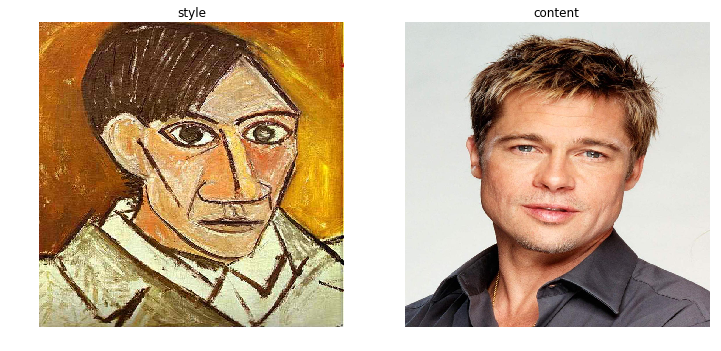

In [3]:
content_image = utils.load_image('images/content/brad_pitt.jpg')
style_image = utils.load_image('images/style/picasso.jpg')

_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
im_size = (1024, 1024)
ax1.imshow(style_image.resize(im_size))
ax2.imshow(content_image.resize(im_size))
ax1.set_title('style')
ax2.set_title('content')
ax1.axis('off')
ax2.axis('off');

In [4]:
USE_GPU = torch.cuda.is_available()
print(USE_GPU)

True


In [5]:
content_var = utils.load_variable(content_image, gpu=USE_GPU)
style_var = utils.load_variable(style_image, gpu=USE_GPU)

In [6]:
features_extractor = utils.load_features_extractor('vgg19')

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.torch/models/vgg19-dcbb9e9d.pth
100%|██████████| 574673361/574673361 [00:17<00:00, 32885590.43it/s]


In [7]:
model = NeuralStyleNet(features_extractor)
if USE_GPU:
    model.cuda()

content_weight, style_weight = 1, 1000
_solver = Solver(model, content_var, style_var, content_weight=content_weight,
                 style_weight=style_weight, num_iters=150, gpu=USE_GPU)
styled_image = _solver.train()

it: 0, content: 0.0, style: 205.4083251953125
it: 50, content: 1.9636892080307007, style: 1.7558653354644775
it: 100, content: 1.6915653944015503, style: 0.8469771146774292
it: 150, content: 1.6418697834014893, style: 0.39723414182662964


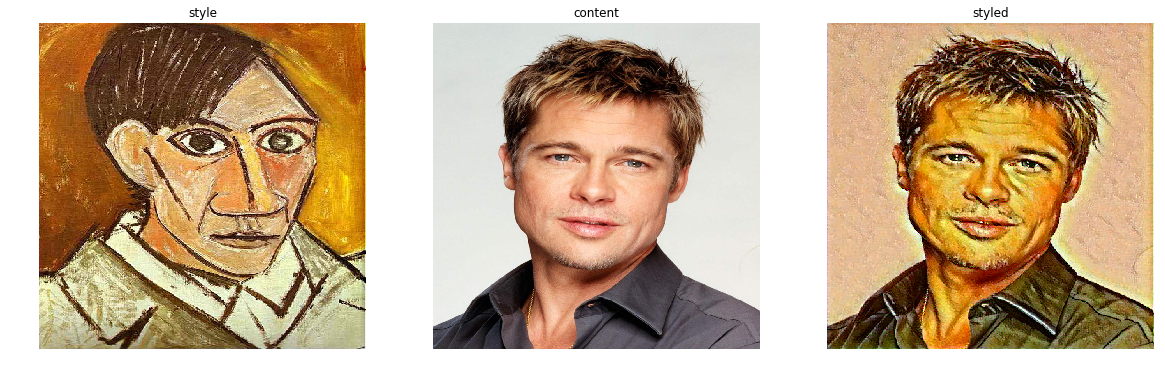

In [8]:
_, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 6))
im_size = (1024, 1024)
ax1.imshow(style_image.resize(im_size))
ax2.imshow(content_image.resize(im_size))
ax3.imshow(styled_image.resize(im_size))
ax1.set_title('style')
ax2.set_title('content')
ax3.set_title('styled')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off');